In [1]:
# ============================== loading libraries ===========================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from collections import Counter
# =============================================================================================

In [2]:
# Part I
# ============================== data preprocessing ===========================================

# define column names
names = ['x', 'y', 'class']

# loading training data
df = pd.read_csv('./demo_data/3.concertriccir2.csv', header=None, names=names)
print(df.head())

# create design matrix X and target vector y
X = df.iloc[:, :2]
y = df['class']

          x         y  class
0  0.700335 -0.247068    0.0
1 -3.950019  2.740080    1.0
2  0.150222 -2.157638    1.0
3 -1.672050 -0.941519    1.0
4  2.560483 -1.846577    1.0


### Simple Cross Validation 

In [34]:
# split the data set into train and test
X_1, X_test, y_1, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# split the train data set into cross validation train and cross validation test
X_tr, X_cv, y_tr, y_cv = train_test_split(X_1, y_1, test_size=0.3, random_state=0)

for i in range(1,30,2):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i)

    # fitting the model on crossvalidation train
    knn.fit(X_tr, y_tr)

    # predict the response on the crossvalidation train
    pred = knn.predict(X_cv)

    # evaluate CV accuracy
    acc = accuracy_score(y_cv, pred) * float(100)
    print('\nCV accuracy for k = {} is {}%'.format(i, np.round(acc,1)))
    
knn = KNeighborsClassifier(1)
knn.fit(X_tr,y_tr)
pred = knn.predict(X_test)
acc = accuracy_score(y_test, pred, normalize=True) * float(100)
print('\n****Test accuracy for k = 1 is {}%'.format(acc))


CV accuracy for k = 1 is 90.5%

CV accuracy for k = 3 is 84.8%

CV accuracy for k = 5 is 87.6%

CV accuracy for k = 7 is 87.6%

CV accuracy for k = 9 is 81.9%

CV accuracy for k = 11 is 83.8%

CV accuracy for k = 13 is 81.9%

CV accuracy for k = 15 is 81.0%

CV accuracy for k = 17 is 79.0%

CV accuracy for k = 19 is 72.4%

CV accuracy for k = 21 is 73.3%

CV accuracy for k = 23 is 72.4%

CV accuracy for k = 25 is 67.6%

CV accuracy for k = 27 is 65.7%

CV accuracy for k = 29 is 64.8%

****Test accuracy for k = 1 is 90.0%


### 10 fold cross validation 


The optimal number of neighbors is 5


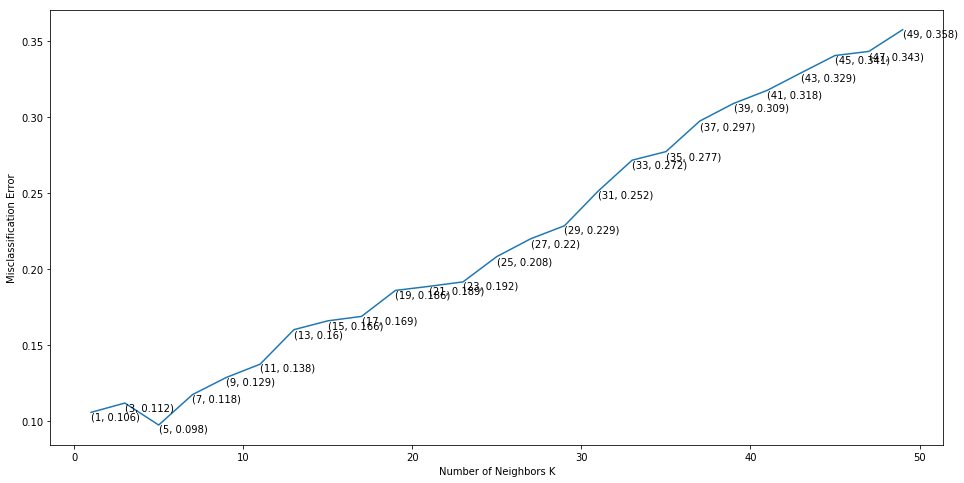

the misclassification error for each k value is :  [0.106 0.112 0.098 0.118 0.129 0.138 0.16  0.166 0.169 0.186 0.189 0.192
 0.208 0.22  0.229 0.252 0.272 0.277 0.297 0.309 0.318 0.329 0.341 0.343
 0.358]


In [54]:
# creating odd list of K for KNN
neighbors = list(np.arange(1, 50, 2))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_1, y_1, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is {}'.format(optimal_k))

# plot misclassification error vs k
plt.figure(figsize=(16, 8))
plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE, 3)):
    plt.annotate('{}'.format(xy), xy=(xy[0], xy[1] - 0.005), size=10)

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", np.round(MSE, 3))

In [56]:
# ============================== KNN with k = optimal_k ===============================================
# instantiate learning model k = optimal_k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)

# fitting the model
knn_optimal.fit(X_1, y_1)

# predict the response
pred = knn_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))


The accuracy of the knn classifier for k = 5 is 88.000000%
